In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
df = pd.read_csv('data/stud.csv')
print(df)
print('sdfvsdvsdv')

     gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none          72             72         

In [40]:
df.describe()
# df.describe() sirve para describir el dataframe


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Buscamos missing values

In [41]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Para buscar los valores unicos en cada columna
    * la primera es como lo hace el profesor, la segunda es como lo hago yo

In [42]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [43]:
columnas=df.columns
columnas=columnas.tolist()
columnas
for i in columnas:
    print("Categories in", i ,   )
    print(df[i].unique() )

Categories in gender
['female' 'male']
Categories in race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch
['standard' 'free/reduced']
Categories in test_preparation_course
['none' 'completed']
Categories in math_score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in reading_score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  5

In [44]:
# define numerical & categorical columns
    # se revisa si es numerico o no por medio del =='O' y del !='O'
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [45]:
columnas

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [46]:
print(df['math_score'].dtype)
print('sdvsdsdsdcv')


int64
sdvsdsdsdcv


Hacemos un promedio de los tres puntajes en las columnas

In [47]:
df['Total_Score']=(df['math_score'] + df['reading_score'] + df['writing_score'])
df['Average_Score']=(df['Total_Score']/3)


In [48]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

Se hace una grafica en la que se compara el promedio de los que hicieron el test_preparation_course y los que no lo hicieron.

In [49]:
prepared=df[df['test_preparation_course']=='completed']
unprepared=df[df['test_preparation_course']=='none']
unprepared

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
...,...,...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76,207,69.000000
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208,69.333333
994,male,group A,high school,standard,none,63,63,62,188,62.666667
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333


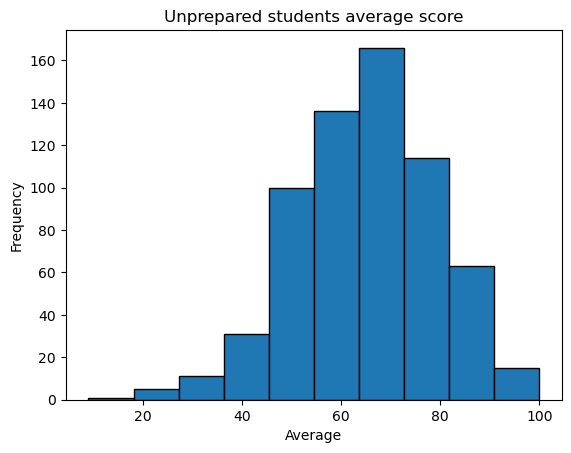

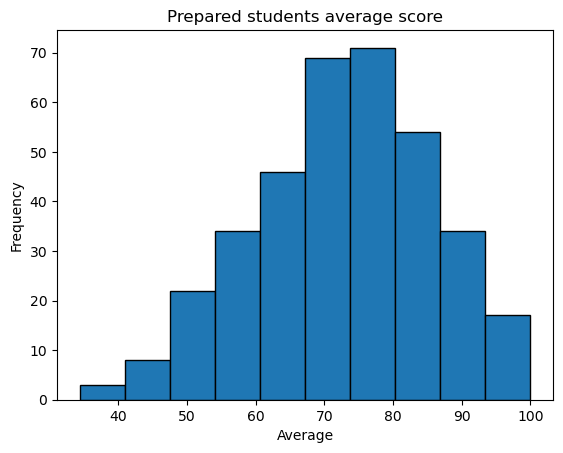

In [50]:
import matplotlib.pyplot as plt
plt.hist(unprepared['Average_Score'], bins=10, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('Unprepared students average score')

# Mostrar el histograma
plt.show()




import matplotlib.pyplot as plt
plt.hist(prepared['Average_Score'], bins=10, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('Prepared students average score')

# Mostrar el histograma
plt.show()



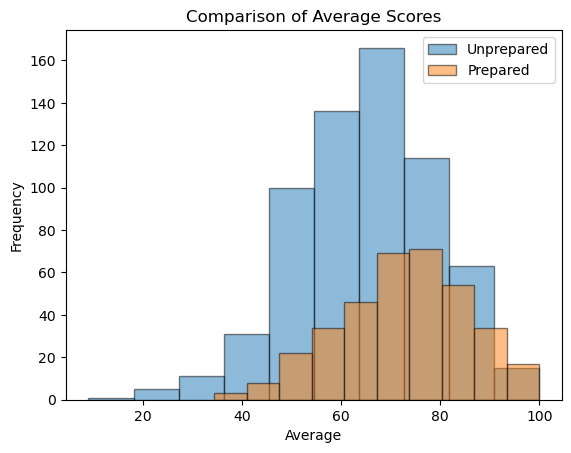

In [51]:
import matplotlib.pyplot as plt

# Supongamos que tienes dos DataFrames: unprepared y prepared
# con una columna 'Average_Score' en cada uno

# Crear el histograma de 'Average_Score' para unprepared
plt.hist(unprepared['Average_Score'], bins=10, alpha=0.5, label='Unprepared', edgecolor='black')

# Crear el histograma de 'Average_Score' para prepared
plt.hist(prepared['Average_Score'], bins=10, alpha=0.5, label='Prepared', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('Comparison of Average Scores')

# Añadir una leyenda
plt.legend(loc='upper right')

# Mostrar el histograma
plt.show()

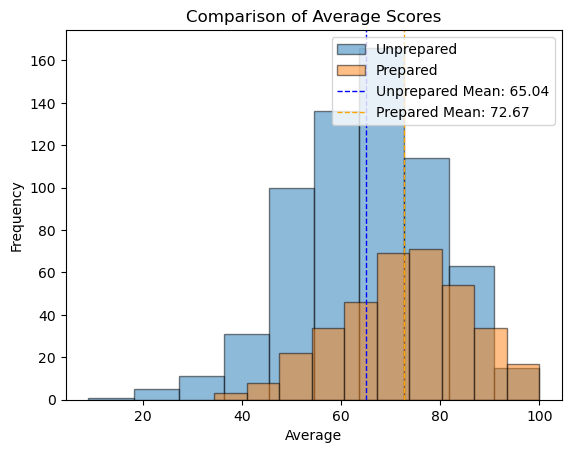

In [52]:
import matplotlib.pyplot as plt

# Supongamos que tienes dos DataFrames: unprepared y prepared
# con una columna 'Average_Score' en cada uno

# Calcular la media de cada conjunto de datos
mean_unprepared = unprepared['Average_Score'].mean()
mean_prepared = prepared['Average_Score'].mean()

# Crear el histograma de 'Average_Score' para unprepared
plt.hist(unprepared['Average_Score'], bins=10, alpha=0.5, label='Unprepared', edgecolor='black')

# Crear el histograma de 'Average_Score' para prepared
plt.hist(prepared['Average_Score'], bins=10, alpha=0.5, label='Prepared', edgecolor='black')

# Añadir líneas verticales para las medias
plt.axvline(mean_unprepared, color='blue', linestyle='dashed', linewidth=1, label=f'Unprepared Mean: {mean_unprepared:.2f}')
plt.axvline(mean_prepared, color='orange', linestyle='dashed', linewidth=1, label=f'Prepared Mean: {mean_prepared:.2f}')

# Añadir etiquetas y título
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('Comparison of Average Scores')

# Añadir una leyenda
plt.legend(loc='upper right')

# Mostrar el histograma
plt.show()

In [53]:
!pip install catboost